<center> <h2>The University of British Columbia</h2> </center>
<center> <h2>Earth and Ocean Sciences 354</h2> </center>
<center> <h3>Geophysical Time Series Analysis</h3> </center>
<center> <h3>Problem Set # 11</h3> </center>

*Due: November 30, 2020*

Learning Goals:
* Use a covariance matrix to define an error ellipsoid
* Learn how to treat data with different accuracy within the same inversion and to identify bad data (copied from below)

1. The epicenter of an earthquake is located by a seismic array. The location procedure gives a covariance matrix of the epicentral coordinates $(X, Y)$ (i.e. coordinates in the horizontal plane referred to Cartesian axes with origin at the epicentre, so $E[X] = E[Y] = 0$).
$$
C = 
\begin{pmatrix}
2 & 1 \\
1 & 2
\end{pmatrix}
$$
with units in km.  
a) Find the equation of the error ellipsoid of the epicenter in terms of $x$ and $y$ where $x$, $y$ are the coordinates of the position vector in the horizontal plane. Note that some of the expressions in the book are not correct. The correct, general equation for the error ellipsoid is $\textbf{x}^\top\textbf{C}^{-1}\textbf{x} \le K^2$, where $K$ is some value that depends on level of confidence, e.g. $K = 1$ for 68% confidence, $K = 2$ for 95% confidence etc.  
b) Sketch the error ellipsoid by finding the eigenvalues and eigenvectors of $\textbf{C}$, and find the direction of the maximum error and the error in that direction.

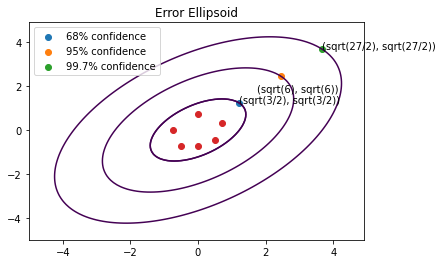

In [5]:
import numpy as np
import matplotlib.pyplot as plt


###QUESTION 1

C = [[2, 1],[1, 2]]
Cinv = np.linalg.inv(C)
coefs = Cinv.flatten()

a = np.arctan2(1, 1)

xrange = np.arange(-5.0, 5.0, 0.1)
yrange = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(xrange,yrange)

#plotting with values from Cinv
F = coefs[0]*X**2 + (coefs[1]+coefs[2])*X*Y + coefs[3]*Y**2

#plotting with eigenvectors and eigenvalues
r = np.arctan2(1, -1)
a = 1 #eigenvector 1
b = 1/3 #eigenvector 2
G = a*((X*np.cos(r)+Y*np.sin(r))**2)+b*((Y*np.cos(r)-X*np.sin(r))**2)

fig = plt.figure()
ax = fig.add_subplot(111)

plt.contour(X, Y, (F - 1), [0])
plt.contour(X, Y, (G - 1), [0])
plt.contour(X, Y, (F - 4), [0])
plt.contour(X, Y, (F - 9), [0])

plt.scatter(np.sqrt(3/2),np.sqrt(3/2))
plt.scatter(np.sqrt(6),np.sqrt(6))
plt.scatter(np.sqrt(27/2),np.sqrt(27/2))
ax.annotate("(sqrt(3/2), sqrt(3/2))", (np.sqrt(3/2), np.sqrt(3/2)))
ax.annotate("(sqrt(6), sqrt(6))", (np.sqrt(3), np.sqrt(3)))
ax.annotate("(sqrt(27/2), sqrt(27/2))", (np.sqrt(27/2), np.sqrt(27/2)))
plt.scatter([0, -0.75, -0.5, 0, 0.5, 0.7], [0.75, 0, -0.75, -0.75, -0.45, 0.3])

plt.legend(["68% confidence", "95% confidence", "99.7% confidence"])
plt.title("Error Ellipsoid")
plt.show()

2. The purpose of this exercise is to learn how to treat data with different accuracy within the same inversion and to identify bad data. Ideally you should have an accurate error estimate on every measurement but mistakes can often occur that can ruin the inversion. Data have been generated using the formula $y = ax + b$, and subsequently contaminated by i) adding Gaussian noise, and ii) changing 3 of the $y$ values so that they are no longer consistent with the original Gaussian noise distribution. You have to identify the 3 bad values and remove them, then obtain best estimates of $a$ and $b$. The data are in a file called `prac3.csv`, in variables `x`, `y`, `sig`.  

a) Find a least squares line fit to the data. Plot the data and your line together.  

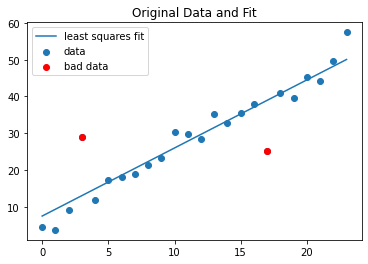

In [8]:
import csv

sig = []
x = []
y = []

with open('prac3.csv', newline='') as File:
    reader = csv.reader(File)
    next(reader)
    for row in reader:
        sig = np.append(sig, [float(row[0])])
        x = np.append(x, [float(row[1])])
        y = np.append(y, [float(row[2])])

###QUESTION 2A

A = []
for i in x:
    A.append([i, 1])

normalEquationsMatrix = np.matmul(np.transpose(A), A)
ATy = np.matmul(np.transpose(A), y)
m = np.matmul(np.linalg.inv(normalEquationsMatrix), ATy)

plt.plot(x, m[0]*x + m[1])
plt.scatter(x, y)
plt.scatter(x[3], y[3], color = 'red')
plt.scatter(x[17], y[17], color = 'red')
plt.legend(["least squares fit", "data", "bad data"])
plt.title("Original Data and Fit")
plt.show()

b) How many obviously bad data can you see?  

c) Remove them, but only if you are absolutely sure that they are bad. Find a new straight line fit and plot it against the data.  

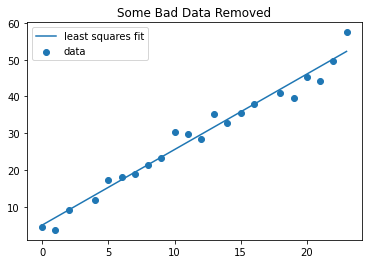

In [9]:
###QUESTION 2 C
# removing the data at index 3 and 17

xp = np.delete(x, 17)
xp = np.delete(xp, 3)
yp = np.delete(y, 17)
yp = np.delete(yp, 3)
Ap = np.delete(A, 17, axis=0)
Ap = np.delete(Ap, 3, axis=0)


normalEquationsMatrix = np.matmul(np.transpose(Ap), Ap)
ATy = np.matmul(np.transpose(Ap), yp)
m = np.matmul(np.linalg.inv(normalEquationsMatrix), ATy)

plt.plot(x, m[0]*x + m[1])
plt.scatter(xp, yp)
plt.legend(["least squares fit", "data"])
plt.title("Some Bad Data Removed")
plt.show()

d) Can you see any more obvious bad data? If so remove them. Now weight the data: noise was simulated by adding normally distributed numbers with a standard deviation $σ = 1, 2, 1, 4$ repeated in cycles; this is contained in the variable `sig`. Construct a diagonal weight matrix $\textbf{C}_e^{-1}$ from the variable `sig` in the data file (i.e., discard the equivalent points, then use the `np.diag` function and assume the data are independent). Invert for a straight line again and plot it against the data.  

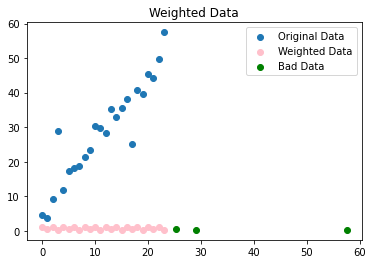

In [10]:
###QUESTION 2 D

weightMatrix = np.diag(sig)
weights = np.diag(np.linalg.inv(weightMatrix))
plt.scatter(x, y)
plt.scatter(x, weights, c = 'pink')
plt.scatter(y[3], weights[3], c = 'green')
plt.scatter(y[17], weights[17], c = 'green')
plt.scatter(y[23], weights[23], c = 'green')
plt.title("Weighted Data")
plt.legend(["Original Data", "Weighted Data", "Bad Data"])
plt.show()

e) Now can you see any bad data? If not, construct the weighted residual vector $\hat{e} = \textbf{C}_e^{-1/2}(\textbf{d} − \textbf{Am})$ and look for any residuals that are significantly greater than 1. Remove the last bad datum and do one final weighted inversion to estimate the parameters $a$,$b$ (the actual values are 2,5).

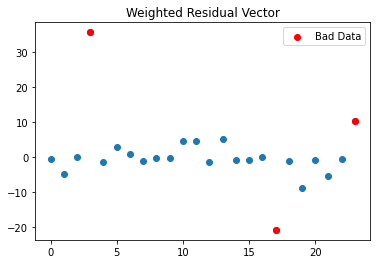

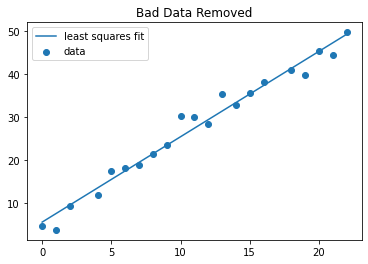

In [11]:
###QUESTION 2 E
#weighted residual vector
e = np.diag(np.diag(np.sqrt(sig)) * (y - np.matmul(A, m)))
plt.scatter(x, e)
plt.scatter(x[3], e[3], c = 'red', label = "Bad Data")
plt.scatter(x[17], e[17], c = 'red')
plt.scatter(x[23], e[23], c = 'red')
plt.title("Weighted Residual Vector")
plt.legend()
plt.show()

#removing bad data
xp = x
yp = y
Ap = A
for i in [23, 17, 3]: #21, 19, 13
    xp = np.delete(xp, i)
    yp = np.delete(yp, i)
    Ap = np.delete(Ap, i, axis=0)

#new fit
normalEquationsMatrix = np.matmul(np.transpose(Ap), Ap)
ATy = np.matmul(np.transpose(Ap), yp)
m = np.matmul(np.linalg.inv(normalEquationsMatrix), ATy)

plt.plot(xp, m[0]*xp + m[1])
plt.scatter(xp, yp)
plt.legend(["least squares fit", "data"])
plt.title("Bad Data Removed")
plt.show()